EDA Student Performance Indicator
1) Problem Statemnt
This Project understands how the students performance (test score) is affected by other variables such as gender ethinicty parental level of ducation,lunch and test preparation course

2) data collection -  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977.
The data consists of 8 columns and 1000 rows

3) DataSet Information

gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Read the Dataset


In [5]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

dataset have 1000 rows and 8 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


math_score,reading_score and writting_score are int type
other features are categorical

In [6]:
##check missing values:

df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


dataset have no null values

In [7]:
df.isna().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
##check the number of unique values in each columns:
df.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
##categorical columns:
[feature for feature in df.columns if df[feature].dtype == 'O']

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [16]:
##numerical features:
[feature for feature in df.columns if df[feature].dtype != 'O']

['math_score', 'reading_score', 'writing_score']

In [17]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [18]:
df['race_ethnicity'].value_counts()

,count
race_ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [7]:
##agrgate the total score with mean
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avreage_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avreage_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


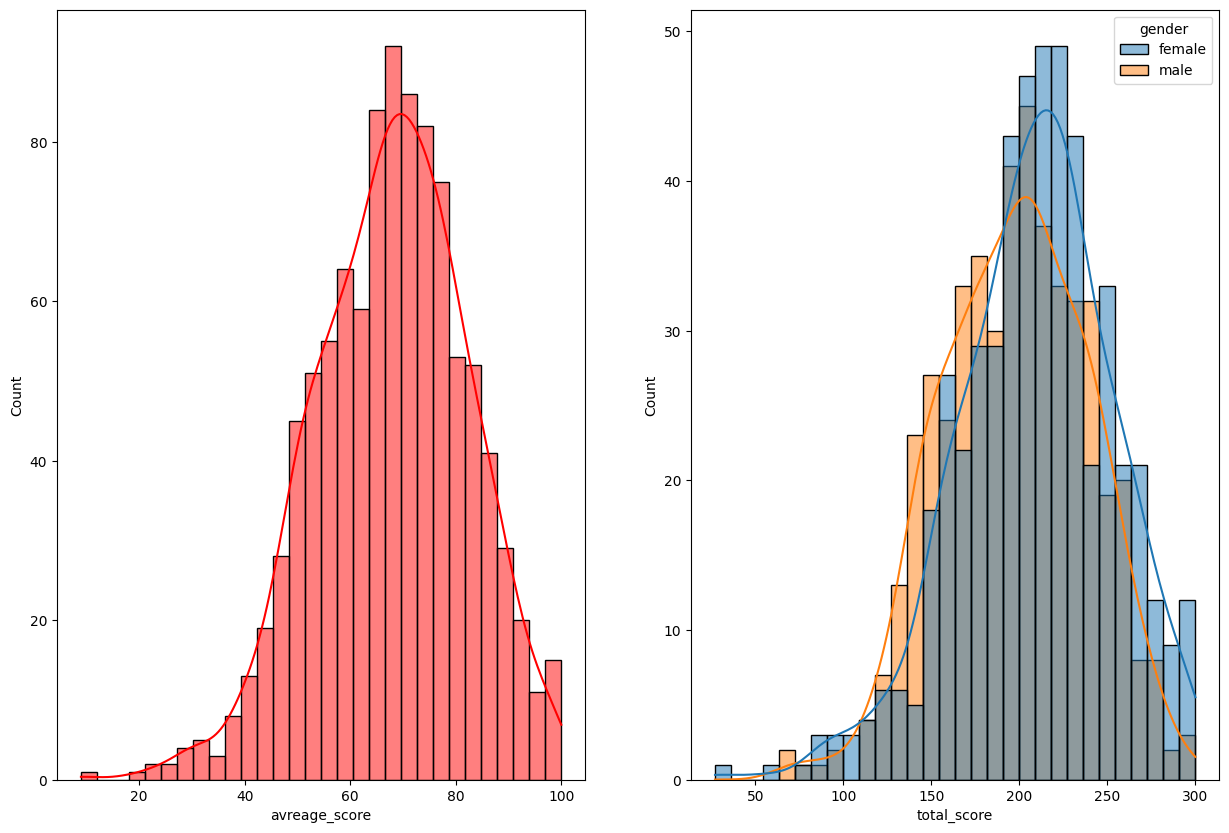

In [8]:
## explore more visualisation:

fix,axis = plt.subplots(figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df,x='avreage_score',bins=30,kde=True,color='red')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='blue',hue='gender')
plt.show()


Insights: Female Students tend to perform more than male

Insights - Average Score was affected by Lunch and test preparation course

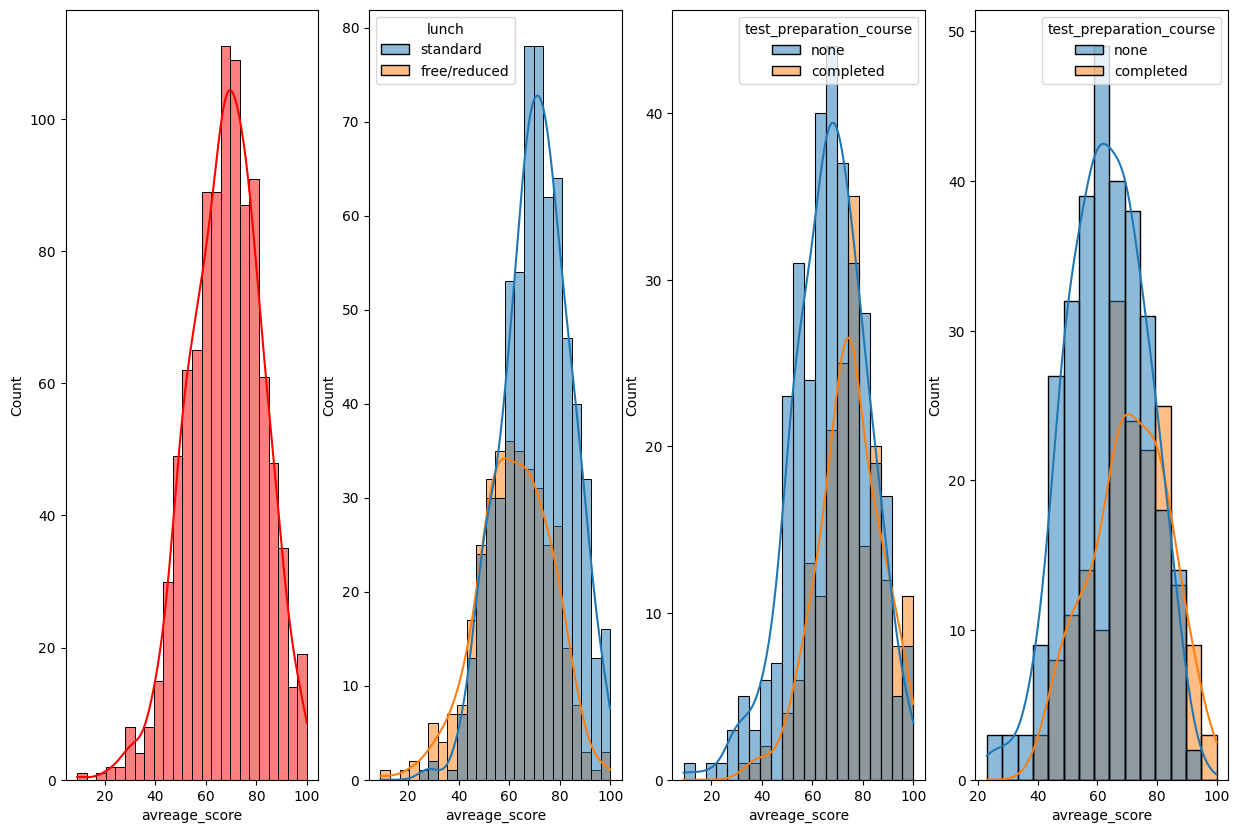

In [10]:
plt.subplots(1,3,figsize=(15,10))
plt.subplot(141)
sns.histplot(data=df,x='avreage_score',kde=True,color='red')
plt.subplot(142)
sns.histplot(data=df,x='avreage_score',kde=True,color='blue',hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'],x='avreage_score',kde=True,color='green',hue='test_preparation_course') # Filter the DataFrame before passing it to sns.histplot
plt.subplot(144)
sns.histplot(data=df[df.gender == 'male'],x='avreage_score',kde=True,color='orange',hue='test_preparation_course') # Filter the DataFrame before passing it to sns.histplot
plt.show()

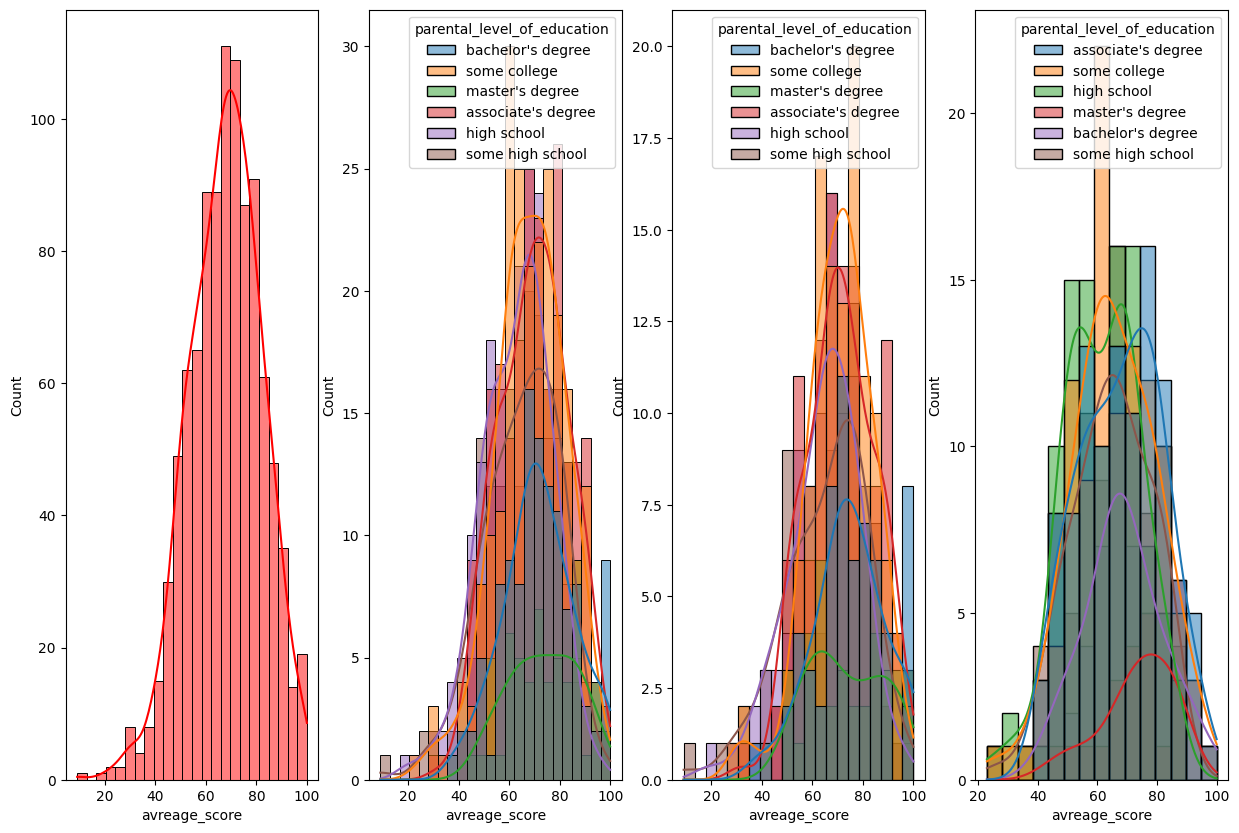

In [12]:
plt.subplots(1,3,figsize=(15,10))
plt.subplot(141)
sns.histplot(data=df,x='avreage_score',kde=True,color='red')
plt.subplot(142)
sns.histplot(data=df,x='avreage_score',kde=True,color='blue',hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'],x='avreage_score',kde=True,color='green',hue='parental_level_of_education') # Filter the DataFrame before passing it to sns.histplot
plt.subplot(144)
sns.histplot(data=df[df.gender == 'male'],x='avreage_score',kde=True,color='orange',hue='parental_level_of_education') # Filter the DataFrame before passing it to sns.histplot
plt.show()

Insights:
in general parent's education dont helps students to perform well in exam

4th plot shows that parents whose education is of assosiate or masters degree are tends to perform well in the exam

3rd plot we can see there is no effect of parents education on female students

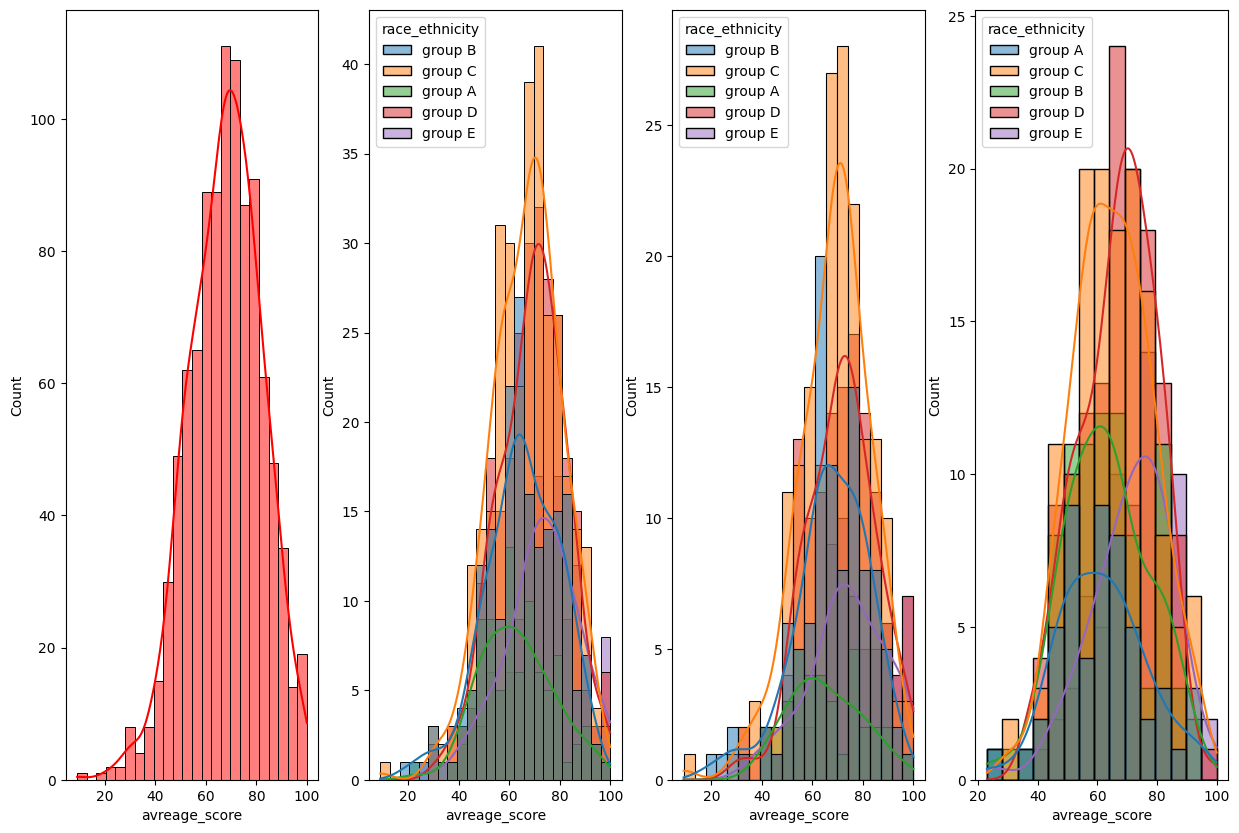

In [14]:
plt.subplots(1,3,figsize=(15,10))
plt.subplot(141)
sns.histplot(data=df,x='avreage_score',kde=True,color='red')
plt.subplot(142)
sns.histplot(data=df,x='avreage_score',kde=True,color='blue',hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'],x='avreage_score',kde=True,color='green',hue='race_ethnicity') # Filter the DataFrame before passing it to sns.histplot
plt.subplot(144)
sns.histplot(data=df[df.gender == 'male'],x='avreage_score',kde=True,color='orange',hue='race_ethnicity') # Filter the DataFrame before passing it to sns.histplot
plt.show()

Insights :  Students of Group A and B tends to perform poor in the exam

while students of Group C and D tends to perform better in the exam

<Axes: >

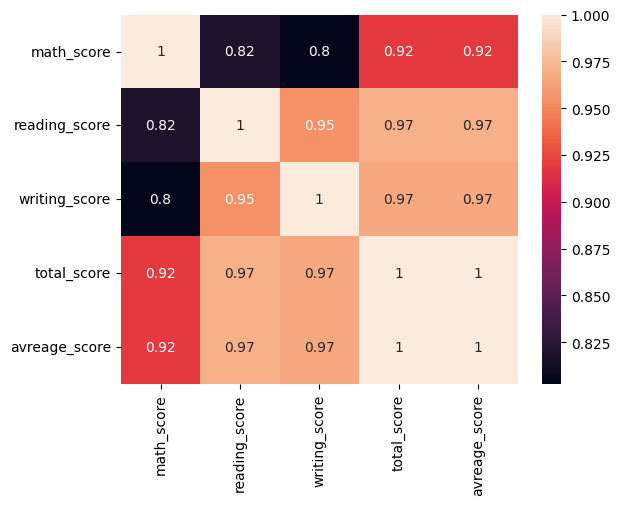

In [17]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True) # Select only numeric columns from the DataFrame before calling .corr()

Insights : All the features are Positively Co-related to each other..